In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens-1m-dataset/users.dat
/kaggle/input/movielens-1m-dataset/ratings.dat
/kaggle/input/movielens-1m-dataset/README
/kaggle/input/movielens-1m-dataset/movies.dat


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
import re
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
movies = pd.read_csv('/kaggle/input/movielens-1m-dataset/movies.dat',sep='::',header=None,names=["MovieID", "Title", "Genres"])
ratings = pd.read_csv('/kaggle/input/movielens-1m-dataset/ratings.dat',sep='::',header=None,names=["UserID", "MovieID", "Rating", "Timestamp"])
users = pd.read_csv('/kaggle/input/movielens-1m-dataset/users.dat',sep='::',header=None,names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])

In [4]:
movies.shape, ratings.shape, users.shape

((3883, 3), (1000209, 4), (6040, 5))

In [5]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
movies.info(), ratings.info(), users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 

(None, None, None)

In [9]:
movies.describe(include='all')

,MovieID,Title,Genres
count,3883.000000,3883,3883
unique,NaN,3883,301
top,NaN,Flesh and Bone (1993),Drama
freq,NaN,1,843
mean,1986.049446,NaN,NaN
std,1146.778349,NaN,NaN
min,1.000000,NaN,NaN
25%,982.500000,NaN,NaN
50%,2010.000000,NaN,NaN
75%,2980.500000,NaN,NaN


In [10]:
ratings.describe(include='all')

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [11]:
users.describe(include='all')

,UserID,Gender,Age,Occupation,Zip-code
count,6040.000000,6040,6040.000000,6040.000000,6040
unique,NaN,2,NaN,NaN,3439
top,NaN,M,NaN,NaN,48104
freq,NaN,4331,NaN,NaN,19
mean,3020.500000,NaN,30.639238,8.146854,NaN
std,1743.742145,NaN,12.895962,6.329511,NaN
min,1.000000,NaN,1.000000,0.000000,NaN
25%,1510.750000,NaN,25.000000,3.000000,NaN
50%,3020.500000,NaN,25.000000,7.000000,NaN
75%,4530.250000,NaN,35.000000,14.000000,NaN


In [12]:
moviesandratings = pd.merge(left=movies,right=ratings,how='inner',on='MovieID')
movieratingsusers = pd.merge(left=moviesandratings,right=users,how='inner',on='UserID')

In [13]:
data = movieratingsusers.copy()
data.drop(['Timestamp','Zip-code'],axis=1,inplace=True)
data.info( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Gender      1000209 non-null  object
 6   Age         1000209 non-null  int64 
 7   Occupation  1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


In [14]:
data.Age.value_counts()
#We see that Age is not continuous, rather it is discretized

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

<AxesSubplot:>

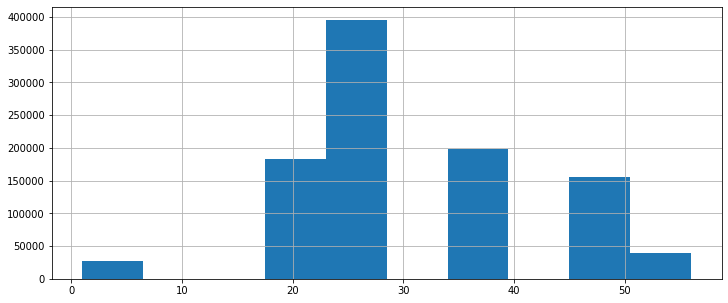

In [15]:
data.Age.hist(figsize=(12,5))

In [16]:
def search_name(movie_name):
  return(re.search("Toy Story".lower(),movie_name.lower()) is not None)

data['Toy_Story']=data['Title'].apply(search_name)

Toy_Story  = data[data.Toy_Story==True]
Toy_Story.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation,Toy_Story
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,True
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,F,1,10,True
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,F,50,9,True
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,M,25,12,True
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,M,25,17,True


In [17]:
Toy_Story.groupby(['Title','Rating']).count().UserID

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
Name: UserID, dtype: int64

In [18]:
data.groupby('Title').count().UserID.sort_values(ascending=False)[0:25]
#Top 25 most viewed moviews

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [19]:
data.loc[data.UserID==2696,["Title","Rating"]]

,Title,Rating
991035,"Client, The (1994)",3
991036,Lone Star (1996),5
991037,Basic Instinct (1992),4
991038,E.T. the Extra-Terrestrial (1982),3
991039,"Shining, The (1980)",4
991040,Back to the Future (1985),2
991041,Cop Land (1997),3
991042,L.A. Confidential (1997),4
991043,"Game, The (1997)",4
991044,I Know What You Did Last Summer (1997),2


In [20]:
def token_creator(genres):
    l = genres.split("|")
    return l

cv = CountVectorizer(analyzer=token_creator)

matrix_genres = cv.fit_transform(data.Genres)

df = pd.DataFrame(matrix_genres.toarray(),columns = cv.get_feature_names())
df

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1000206,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1000207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
data = pd.concat([data,df],axis=1)
data.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation,Toy_Story,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,True,0,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10,False,0,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,F,1,10,False,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10,False,1,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10,False,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
data['Is_Male']=np.where(data['Gender']=='F',0,1)

data.drop(['MovieID','Title','Genres','UserID','Toy_Story','Gender'],axis=1,inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 22 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   Rating       1000209 non-null  int64
 1   Age          1000209 non-null  int64
 2   Occupation   1000209 non-null  int64
 3   Action       1000209 non-null  int64
 4   Adventure    1000209 non-null  int64
 5   Animation    1000209 non-null  int64
 6   Children's   1000209 non-null  int64
 7   Comedy       1000209 non-null  int64
 8   Crime        1000209 non-null  int64
 9   Documentary  1000209 non-null  int64
 10  Drama        1000209 non-null  int64
 11  Fantasy      1000209 non-null  int64
 12  Film-Noir    1000209 non-null  int64
 13  Horror       1000209 non-null  int64
 14  Musical      1000209 non-null  int64
 15  Mystery      1000209 non-null  int64
 16  Romance      1000209 non-null  int64
 17  Sci-Fi       1000209 non-null  int64
 18  Thriller     1000209 non-null  int64
 19  

In [23]:
X = data.drop('Rating',axis=1)
y = data[['Rating']]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
gnb = GaussianNB()
cv = cross_val_score(gnb,x_train,y_train,cv=2)
print(cv.mean())

0.28396626834951666


In [27]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,x_train,y_train,cv=2)
print(cv.mean())

0.3402852206740998


In [28]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train,y_train,cv=2)
print(cv.mean())

0.34435237470606117


In [29]:
model = rf.fit(x_train,y_train)

In [30]:
y_pred = model.predict(x_test)
y_pred

array([4, 4, 4, ..., 4, 3, 3])

In [31]:
accuracy_score(y_test,y_pred)

0.35310914086213724